#                       Phase 3 project: Predicting customer churn


Problem Statement: Predicting Customer Churn for SyriaTel Telecommunications Company

# Bussiness understanding

SyriaTel is a telecommunication company in Syria.it's one of the companies that provide communication services, it cuurently experience decrease in revenue returns. Customer churn is one of the problem the company is facing. Due to the direct effect on the company revenue, the company is looking to identify means to predict potential costumers to churn. therefore finding factors that increases customer churn is important in order to mitigate the risk by taking the neccesary action

## objectives

The objective of the project is to identify the best machine learning model that can predict causes of customer churn and how to metigate it in order to avoid lossing the customers and what to improve on the services provided

Methodlogy

The methodology for this project will involve exploratory data analysis, pre-processing, feature selection, model selection, model training, model evaluation, and deployment. The performance of different machine learning algorithms will be compared and the best-performing model will be selected for deployment.

###  loading data

In [ ]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, plot_confusion_matrix, precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
import seaborn as sns

sns.set(style="white")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape

(3333, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the dataset, some of the variables are categorical like:

1.   state
2.   phone number
3.   international plan
4.   voice mail plan



# Explonatory Data Analysis (EDA)

In [ ]:
# replace whitespace in column names with _
sy_col = df.columns.str.replace('\s+', '_') 

# change old column names to new column names without whitespace
df.columns = sy_col

# double check changes
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
duplicates = df.duplicated()
print(duplicates.sum()) # prints the number of duplicate rows

df[duplicates] # prints the duplicate rows


0


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn


In [ ]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [ ]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

This show the number of customer who left are 483 which in a propotion of ascale 0-1 is 0.1449 versus those who didn't leave are 2850 which is 0.855

In [ ]:
mult_df = pd.DataFrame()

In [ ]:
mult_df['day_mins_charge'] = df['total_day_charge'] /  df['total_day_minutes']
#mult_df['day_calls_charge'] = df['total_day_charge'] / mult_df['sum_day_calls']
mult_df['eve_mins_charge'] = df['total_eve_charge'] / df['total_eve_minutes']
mult_df['night_mins_charge'] = df['total_night_charge'] / df['total_night_minutes']
mult_df['intl_mins_charge'] = df['total_intl_charge'] / df['total_intl_minutes']

In [ ]:
mult_df['avg_day_call'] = df['total_day_minutes'] / df['total_day_calls']
mult_df['avg_eve_call'] = df['total_eve_minutes'] / df['total_eve_calls']
mult_df['avg_night_call'] = df['total_night_minutes'] / df['total_night_calls']
mult_df['avg_intl_call'] = df['total_intl_minutes'] / df['total_intl_calls']

In [ ]:
mult_df.head()

,day_mins_charge,eve_mins_charge,night_mins_charge,intl_mins_charge,avg_day_call,avg_eve_call,avg_night_call,avg_intl_call
0,0.003772,0.085005,0.044994,0.270000,2.410000,1.993939,2.689011,3.333333
1,0.006188,0.085013,0.045008,0.270073,1.313821,1.898058,2.469903,4.566667
2,0.004108,0.084983,0.045018,0.269672,2.135088,1.101818,1.563462,2.440000
3,0.003340,0.084976,0.044997,0.269697,4.216901,0.703409,2.212360,0.942857
4,0.005999,0.085030,0.044997,0.270297,1.475221,1.215574,1.544628,3.366667


checking for uniqueness in 'phone_number' column

In [ ]:
df.phone_number.nunique()

3333

In [ ]:
# droping the phone_number column as it has no effect on churn
df.drop('phone_number', axis=1, inplace=True)

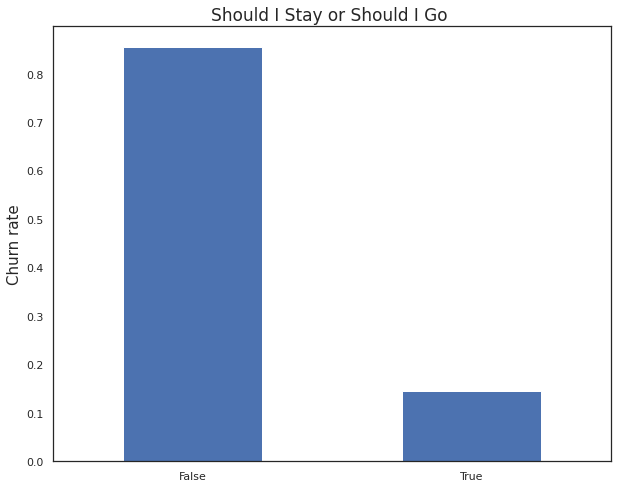

In [ ]:
# the target is an imbalance, 86% False and 14% True, so there is an 86% chance that the model will predict False
df["churn"].value_counts(normalize =True).plot(kind="bar",figsize=(10,8));
plt.title("Should I Stay or Should I Go ", fontsize=17)
plt.ylabel("Churn rate",fontsize=15)
plt.xticks(rotation=0)
plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

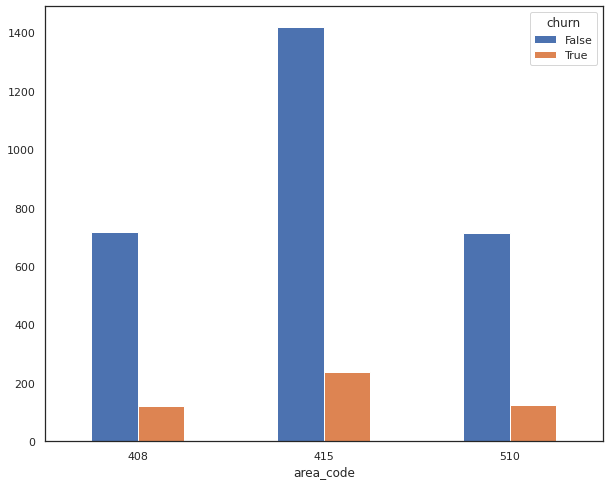

In [ ]:
# Plot Customer Churn by Area Code without normalization
df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=0)


 almost half of the customers have  area code 415

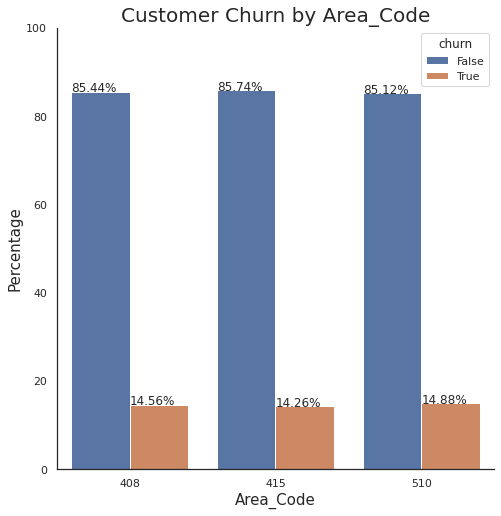

In [ ]:
# Plot Customer Churn by Area Code with normalization
x,y = 'area_code', 'churn'

df2 = df.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df2,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Area_Code', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn by Area_Code', fontsize=20)
plt.show()    


After normalize the value counts of the area code, it is clear that the churn rate is almost the same in all areas.
 so area code doesn't have any significant effect on the customer churn

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

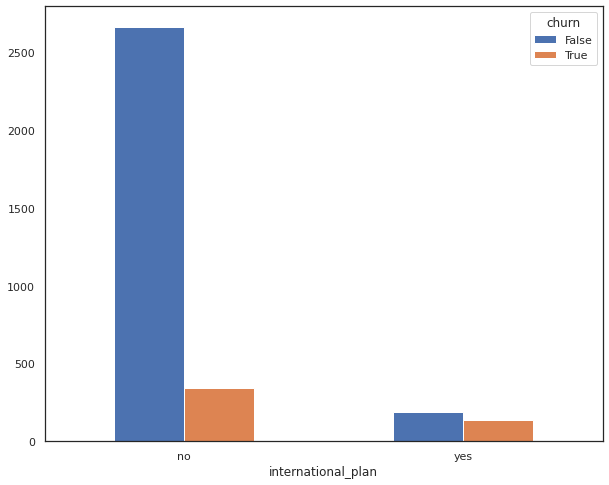

In [ ]:
# plot Customer Churn with International_Plan without normalization
df.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=0)


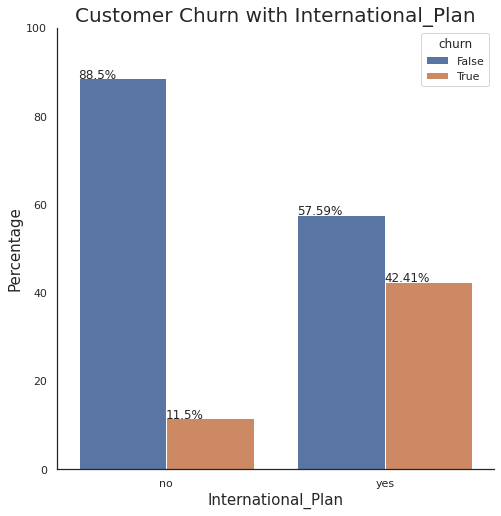

In [ ]:
# plot Customer Churn with International Plan with normalization
x,y = 'international_plan', 'churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df1,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.title('Customer Churn with International_Plan', fontsize=20)    
plt.xlabel('International_Plan', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()    

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

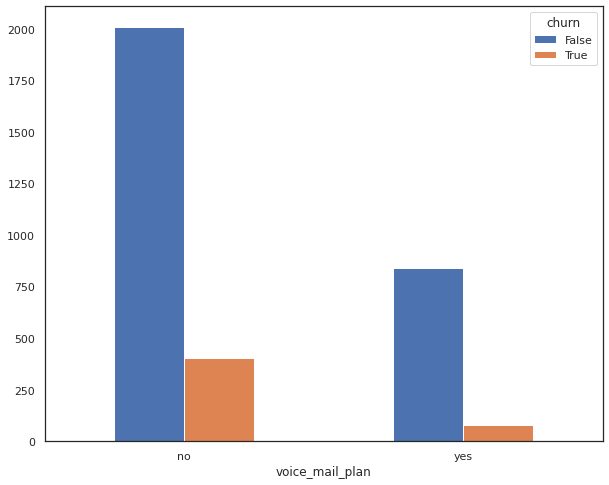

In [ ]:
# Plot Customer Churn with Voice Mail Plan without normalization
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=0)

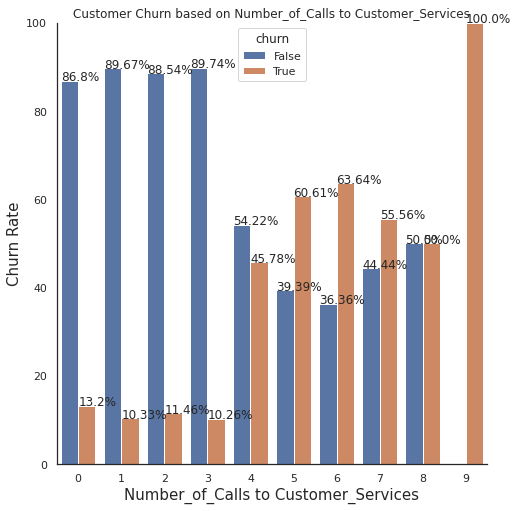

In [ ]:
# Plot Customer Churn based on Number_of_Calls to Customer_Services with normalization
x,y = 'customer_service_calls', 'churn'

df3 = df.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df3,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Number_of_Calls to Customer_Services', fontsize=15)
plt.ylabel('Churn Rate', fontsize=15)
plt.title('Customer Churn based on Number_of_Calls to Customer_Services', fontsize=12)
plt.show()    



Customers are more likely to leave if they call customer service more than three times.


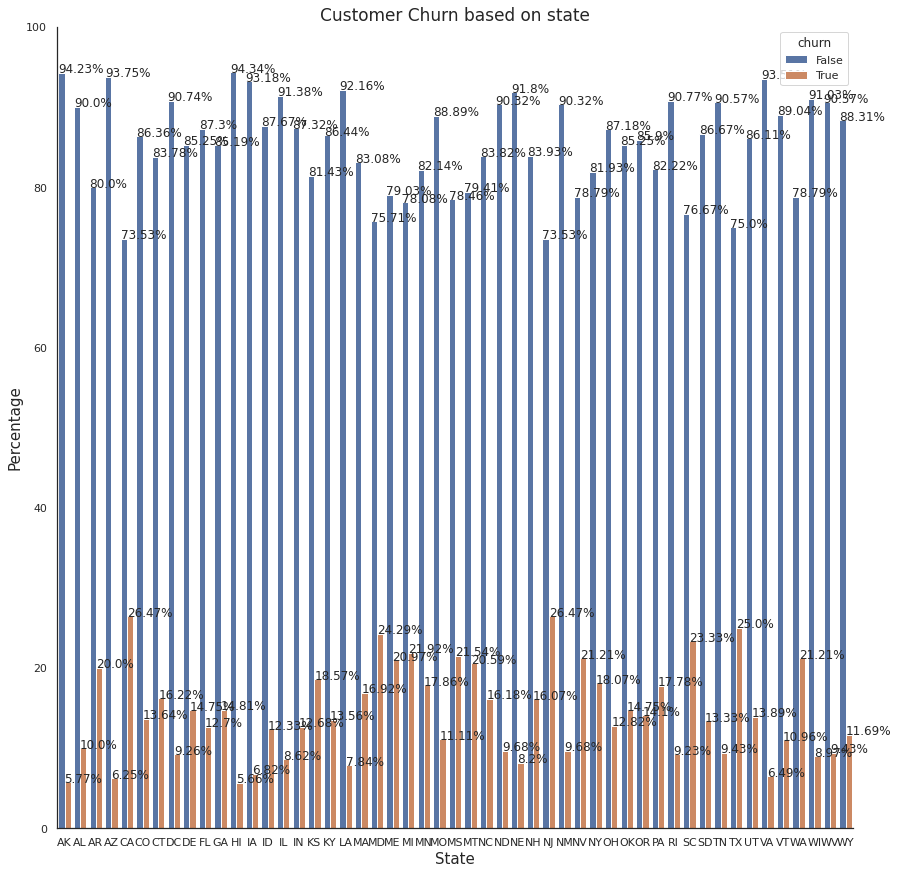

In [ ]:
# plot Customer Churn based on state
x,y = 'state', 'churn'

df4 = df.groupby(x)[y].value_counts(normalize=True)
df4 = df4.mul(100)
df4 = df4.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df4,legend_out=False,height=12, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('State', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn based on state', fontsize=17)
plt.show()    


 the top 5 churn's state are California, New Jersey, Texas, Maryland, and South Carolina,
 maybe they have bad coverage or competitive provider at those states 
 so customer service should pay special attention to those states

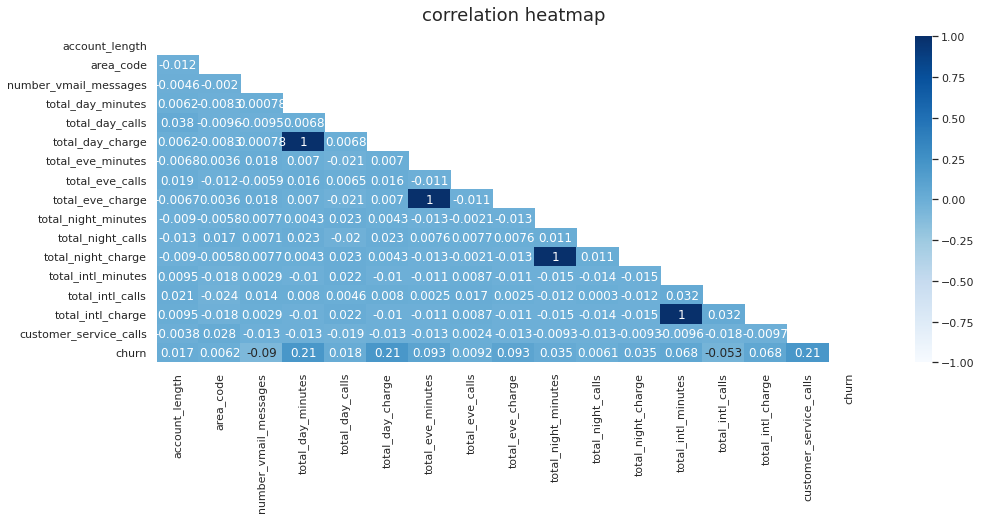

In [ ]:
# heatmap showing the correlations
plt.figure(figsize=(16,6))
mask=np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap=sns.heatmap(df.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')

heatmap.set_title('correlation heatmap', fontdict={'fontsize':18},pad=16);

Heatmap show the relationship betwwen different variables

In [ ]:
# find out what attributes have the highest correlation with churn
corr_matrix = df.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
Name: churn, dtype: float64

customer_service_calls has the highest correlation with churn followd by total_day_minutes and total_day_charge, number_vmail_messages has the lowest correlation with churn(-0.089728)meaning when number of voice mail increases the number of churn decreases.

###  encoding categorical data

changing the column that are not numerical to numerical to make it applicable to modeling traing

In [ ]:
# Change data types to 'category' and change yes/no to 1 or 0
df['state'] = df['state'].astype('category')
df['international_plan'] = df['international_plan'].replace(('yes', 'no'), (1, 0))
df['international_plan'] = df['international_plan'].astype('int')
df['voice_mail_plan'] = df['voice_mail_plan'].replace(('yes', 'no'), (1, 0))
df['voice_mail_plan'] = df['voice_mail_plan'].astype('int')
df['churn'] = df['churn'].replace((True, False), (1, 0))
df['churn'] = df['churn'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   int64   
 3   international_plan      3333 non-null   int64   
 4   voice_mail_plan         3333 non-null   int64   
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_minutes       3333 non-null   float64 
 7   total_day_calls         3333 non-null   int64   
 8   total_day_charge        3333 non-null   float64 
 9   total_eve_minutes       3333 non-null   float64 
 10  total_eve_calls         3333 non-null   int64   
 11  total_eve_charge        3333 non-null   float64 
 12  total_night_minutes     3333 non-null   float64 
 13  total_night_calls       3333 non-null   int64   
 14  total_night_charge      

need to split the data into trainning and testing set for ease when modeling to find the best model for our prediction

In [ ]:
# created a dummy dataset by droping the state column which is not numerical
df = pd.get_dummies(df, columns=['state'], prefix='state')


In [ ]:
X = df.drop(columns='churn')
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modeling

In this step we try to test different model and decide on the one that is suitable  for prediction. The models will be:

*   Logistic regression model
*   SMOTE
*   Decision Tree
*   Grid SearchCv
*   Random Forest
*   XGBoost






### logistic regression 

In [ ]:
#Evaluate predictions
def evaluate_predictions(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
    '''
    Prints the accuracy score, confusion matrix and classification matrix for train and test data.
    
    Parameters
    ----------
    X_train - array-like of shape (n_samples,)
        Train input values.
    X_test - array-like of shape (n_samples,)
        Test input values.
    y_train - array-like of shape (n_samples,)
        Train target values.
    y_test - array-like of shape (n_samples,)
        Test train data.
    y_pred_train - array-like of shape (n_samples,)
        Predicted train data.
    y_pred_test - array-like of shape (n_samples,)
        Predicted test data.
    
    '''
    print('-'*40)
    print('Accuracy score for Training Dataset = ', accuracy_score(y_train, y_hat_train))
    print('Accuracy score for Testing Dataset = ', accuracy_score(y_test, y_hat_test))

    print('-'*40)
    print('------------Confusion Matrix------------')
    print('Train set:')
    print(confusion_matrix(y_train, y_hat_train), '\n')
    print('Test set:')
    print(confusion_matrix(y_test, y_hat_test), '\n')

    print('-'*40)
    print('---------Classification Matrix:---------')
    print('Train set:')
    print(classification_report(y_train, y_hat_train), '\n')
    print('Test set:')
    print(classification_report(y_test, y_hat_test))

In [ ]:
# modeling with LogesticRegression
# create an instance and fit the model 
base_logmodel = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
base_logmodel.fit(X_train, y_train)

#predictions
y_hat_train = base_logmodel.predict(X_train)
y_hat_test = base_logmodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.6634653861544618
Accuracy score for Testing Dataset =  0.6462829736211031
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1336  801]
 [  40  322]] 

Test set:
[[441 272]
 [ 23  98]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       0.97      0.63      0.76      2137
           1       0.29      0.89      0.43       362

    accuracy                           0.66      2499
   macro avg       0.63      0.76      0.60      2499
weighted avg       0.87      0.66      0.71      2499
 

Test set:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       713
           1       0.26      0.81      0.40       121

    accuracy                           0.65       834
   macro avg       0.61      0.71    

the precision, recall, and f1-score of class 0 is higher than that of class 1. This indicates that the model is more accurate in predicting class 0 compared to class 1.

In [ ]:
# Compute Receiver operating characteristic (ROC)
# Calculate the probability scores of each point in the training set
y_train_score = base_logmodel.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = base_logmodel.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
# probability that a randomly chosen positive instance is ranked higher 
# than a randomly chosen negative instance
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

Training AUC: 0.84553
Testing AUC: 0.79517


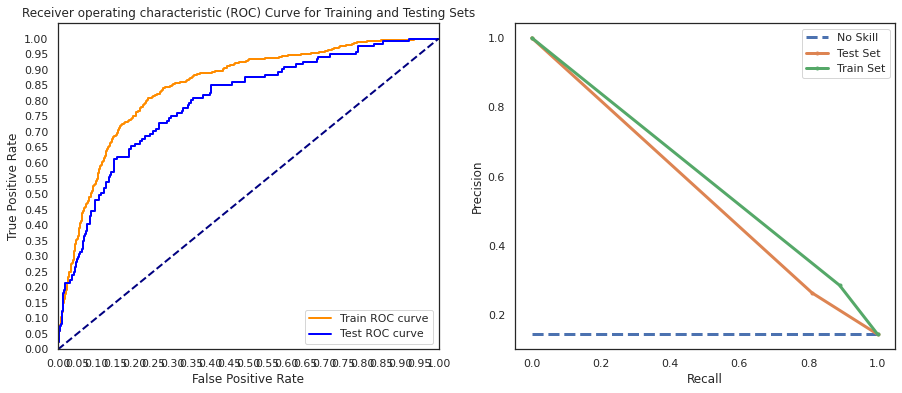

In [ ]:
# ROC curve for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
lw =3
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw = lw, label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
train_precision, train_recall, _ = precision_recall_curve(y_train, y_hat_train)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', lw = lw, label='Test Set')
plt.plot(train_recall,train_precision, marker='.',lw=lw, label='Train Set')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# show the plot
plt.show()

### SMOTE

In [ ]:
smote = SMOTE()
# adasyn = ADASYN()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

-----------------------------------------
Synthetic sample class distribution: 

0    2137
1    2137
Name: churn, dtype: int64


In [ ]:
smote_logmodel = LogisticRegression(fit_intercept=False, C=1e12,
                         solver='liblinear', class_weight='balanced')
smote_logmodel.fit(X_train_resampled, y_train_resampled)

#predictions
y_hat_train = smote_logmodel.predict(X_train_resampled)
y_hat_test = smote_logmodel.predict(X_test)

evaluate_predictions(X_train_resampled, X_test, y_train_resampled, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.7690687880205896
Accuracy score for Testing Dataset =  0.6247002398081535
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1285  852]
 [ 135 2002]] 

Test set:
[[423 290]
 [ 23  98]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      2137
           1       0.70      0.94      0.80      2137

    accuracy                           0.77      4274
   macro avg       0.80      0.77      0.76      4274
weighted avg       0.80      0.77      0.76      4274
 

Test set:
              precision    recall  f1-score   support

           0       0.95      0.59      0.73       713
           1       0.25      0.81      0.39       121

    accuracy                           0.62       834
   macro avg       0.60      0.70    

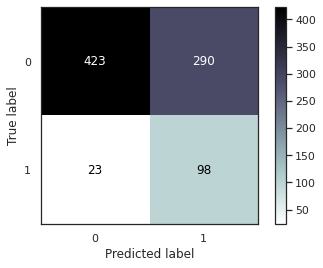

In [ ]:
plot_confusion_matrix(smote_logmodel, X_test, y_test,cmap='bone_r');

In [ ]:
# Compute Receiver operating characteristic (ROC)
# Calculate the probability scores of each point in the training set
y_train_score = smote_logmodel.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = smote_logmodel.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
# probability that a randomly chosen positive instance is ranked higher 
# than a randomly chosen negative instance
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

Training AUC: 0.85027
Testing AUC: 0.79381


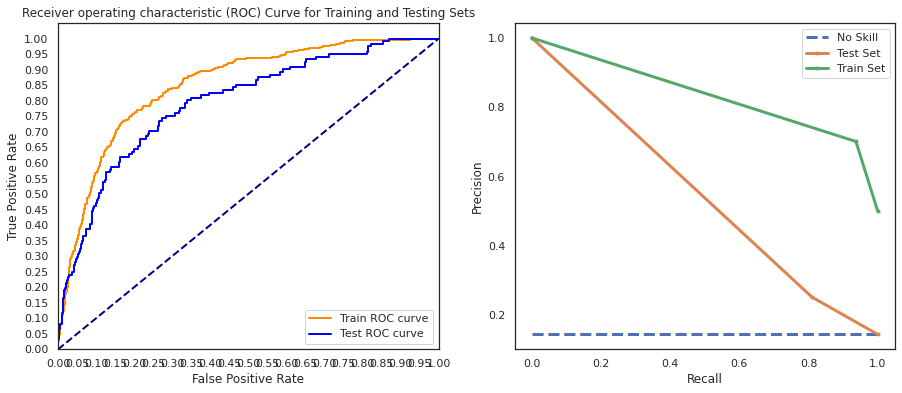

In [ ]:
# ROC curve for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
lw =3
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw = lw, label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
train_precision, train_recall, _ = precision_recall_curve(y_train_resampled, y_hat_train)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', lw = lw, label='Test Set')
plt.plot(train_recall,train_precision, marker='.',lw=lw, label='Train Set')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# show the plot
plt.show()

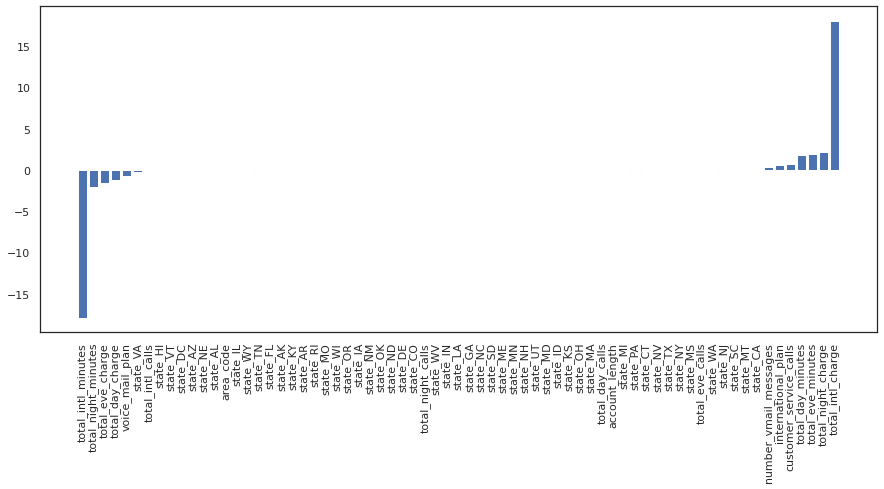

In [ ]:
# To get the weights of all the variables
weights_model = pd.Series(smote_logmodel.coef_[0], index=X.columns.values)
weights_model.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features = plt.bar(weights_model.index, weights_model.values)

In [ ]:
#Grid search for Logistic regression 
lr = LogisticRegression()
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100], "penalty":['l1', 'l2', 'none'],
        'class_weight': ['balanced', None], "solver" : ['liblinear', 'saga'],
        "random_state":[10,15, None]}

grid_clf = GridSearchCV(lr, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'C': 0.001, 'class_weight': None, 'penalty': 'l2', 'random_state': 10, 'solver': 'liblinear'}
0.8607442977190877


In [ ]:
'''
{'C': 0.001,
 'class_weight': None,
 'penalty': 'none',
 'random_state': 10,
 'solver': 'saga'}
'''

grid_logmodel = LogisticRegression(C=0.001, penalty='none', random_state=10,
                         solver='saga', class_weight='none')
grid_logmodel.fit(X_train, y_train)

#Predictions
y_hat_train = grid_logmodel.predict(X_train)
y_hat_test = grid_logmodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.8727490996398559
Accuracy score for Testing Dataset =  0.8621103117505995
----------------------------------------
------------Confusion Matrix------------
Train set:
[[2072   65]
 [ 253  109]] 

Test set:
[[686  27]
 [ 88  33]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2137
           1       0.63      0.30      0.41       362

    accuracy                           0.87      2499
   macro avg       0.76      0.64      0.67      2499
weighted avg       0.85      0.87      0.85      2499
 

Test set:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       713
           1       0.55      0.27      0.36       121

    accuracy                           0.86       834
   macro avg       0.72      0.62    

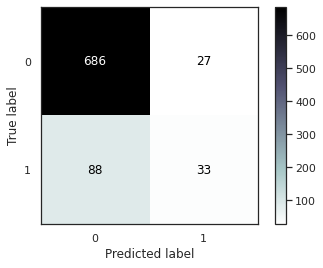

In [ ]:
plot_confusion_matrix(grid_logmodel, X_test, y_test,cmap='bone_r');

In [ ]:
# Compute Receiver operating characteristic (ROC)
# Calculate the probability scores of each point in the training set
y_train_score = grid_logmodel.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = grid_logmodel.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
# probability that a randomly chosen positive instance is ranked higher 
# than a randomly chosen negative instance
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

Training AUC: 0.84567
Testing AUC: 0.79087


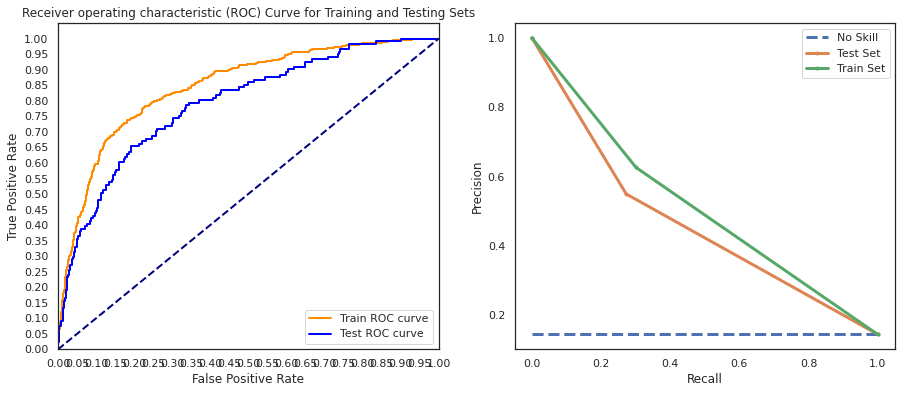

In [ ]:
# ROC curve for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
lw =3
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw = lw, label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
train_precision, train_recall, _ = precision_recall_curve(y_train, y_hat_train)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', lw = lw, label='Test Set')
plt.plot(train_recall,train_precision, marker='.',lw=lw, label='Train Set')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# show the plot
plt.show()

### Decision Tree

In [ ]:
# modeling with Decision Tree
#create an instance and fit the model 
treemodel = DecisionTreeClassifier(random_state=10)
treemodel.fit(X_train, y_train)

#predictions
y_hat_train= treemodel.predict(X_train)
y_hat_test = treemodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.9088729016786571
----------------------------------------
------------Confusion Matrix------------
Train set:
[[2137    0]
 [   0  362]] 

Test set:
[[677  36]
 [ 40  81]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2137
           1       1.00      1.00      1.00       362

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499
 

Test set:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       713
           1       0.69      0.67      0.68       121

    accuracy                           0.91       834
   macro avg       0.82      0.81      0.81       83

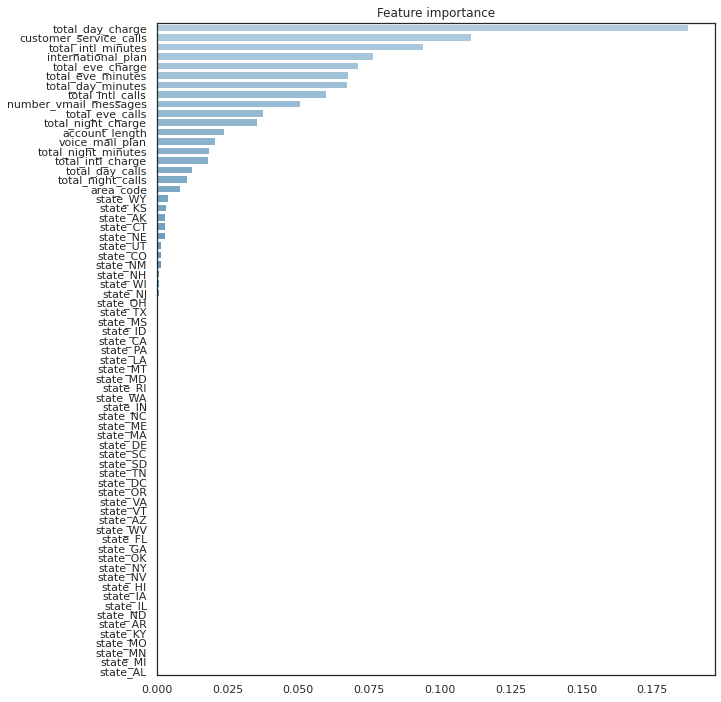

In [ ]:
# Plot features importances
imp = pd.Series(data=treemodel.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

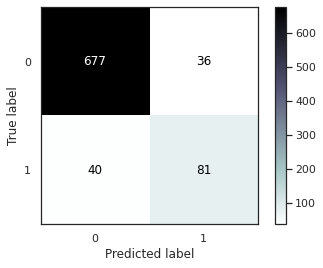

In [ ]:
plot_confusion_matrix(treemodel, X_test, y_test,cmap='bone_r');

In [ ]:
randommodel = RandomForestClassifier(n_estimators=100, max_depth= 5)
randommodel.fit(X_train, y_train)

#predictions
y_hat_train = randommodel.predict(X_train)
y_hat_test = randommodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.8899559823929571
Accuracy score for Testing Dataset =  0.8776978417266187
----------------------------------------
------------Confusion Matrix------------
Train set:
[[2137    0]
 [ 275   87]] 

Test set:
[[711   2]
 [100  21]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2137
           1       1.00      0.24      0.39       362

    accuracy                           0.89      2499
   macro avg       0.94      0.62      0.66      2499
weighted avg       0.90      0.89      0.86      2499
 

Test set:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       713
           1       0.91      0.17      0.29       121

    accuracy                           0.88       834
   macro avg       0.89      0.59    

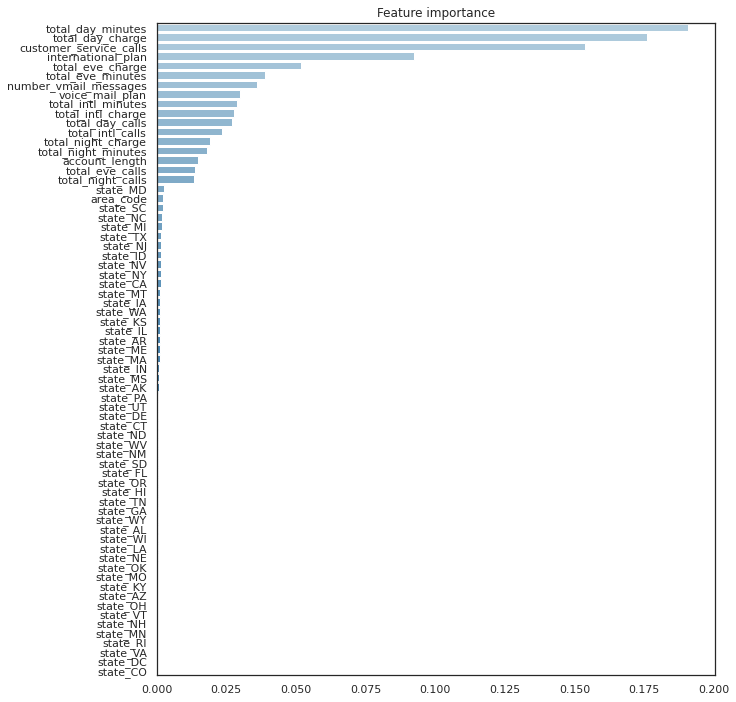

In [ ]:
# Plot features importances
imp = pd.Series(data=randommodel.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

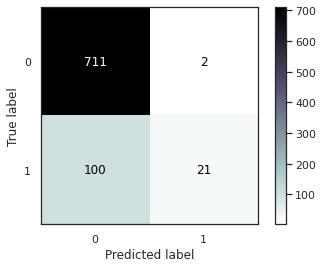

In [ ]:
plot_confusion_matrix(randommodel, X_test, y_test,cmap='bone_r');

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=10)
xgb_model.fit(X_train, y_train)

# predictions
y_hat_train = xgb_model.predict(X_train)
y_hat_test = xgb_model.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)


----------------------------------------
Accuracy score for Training Dataset =  0.9683873549419768
Accuracy score for Testing Dataset =  0.9436450839328537
----------------------------------------
------------Confusion Matrix------------
Train set:
[[2133    4]
 [  75  287]] 

Test set:
[[703  10]
 [ 37  84]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2137
           1       0.99      0.79      0.88       362

    accuracy                           0.97      2499
   macro avg       0.98      0.90      0.93      2499
weighted avg       0.97      0.97      0.97      2499
 

Test set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       713
           1       0.89      0.69      0.78       121

    accuracy                           0.94       834
   macro avg       0.92      0.84    

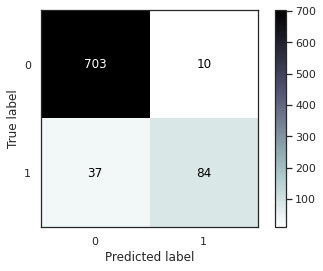

In [ ]:
plot_confusion_matrix(xgb_model, X_test, y_test,cmap='bone_r');

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    "learning_rate": [0.1, 0.5, 0.01],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Initialize GridSearchCV with the XGBoost model and the parameter grid
grid = GridSearchCV(xgb_model, param_grid, scoring="accuracy", cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid.best_params_

# Use the best hyperparameters to create a final XGBoost model
final_xgb_model = xgb.XGBClassifier(**best_params)
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_hat_train = final_xgb_model.predict(X_train)
y_hat_test = final_xgb_model.predict(X_test)

# Evaluate the final XGBoost model using the evaluation function
evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)


----------------------------------------
Accuracy score for Training Dataset =  0.976390556222489
Accuracy score for Testing Dataset =  0.9448441247002398
----------------------------------------
------------Confusion Matrix------------
Train set:
[[2135    2]
 [  57  305]] 

Test set:
[[701  12]
 [ 34  87]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2137
           1       0.99      0.84      0.91       362

    accuracy                           0.98      2499
   macro avg       0.98      0.92      0.95      2499
weighted avg       0.98      0.98      0.98      2499
 

Test set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       713
           1       0.88      0.72      0.79       121

    accuracy                           0.94       834
   macro avg       0.92      0.85     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

XGBoost was the best performing model compared to the other models. Had an Accuracy of 0.9683 and 0.94363 on both train and test dataset. After tuning the XGBoost to see if it improves its performance using hyperparameter tuning, the performance improved and the Accuracy was 0.9763 and 0.9448 on both taining and testing datasets.


The accuracy scores, confusion matrix, and classification report all indicate an improvement in the performance of the model.

In [ ]:
# load the saved model
loaded_model = xgb.Booster()
loaded_model.load_model('xgb.model')

# make predictions on new data
predictions = loaded_model.predict(dtest)


### Conclusion

We droppped the phone_munber column has it unique and personal thus it has no effect on customer leaving and it was of no use for this analyssi

Customers who called more than four times left, this might be due to their concern not addressed or the feedback recieved was not helpful and didn't sort their problem and they opted to try other providers.

There were also some states that had highest number of customers who churned cause of poor network coverage are were not being given priority.

From this analysis it can be concluded that the best performing model is XGBoost which has an Accuracy score for Training Dataset =  0.976390556222489 and Accuracy score for Testing Dataset =  0.9448441247002398 which was an improvement after tuning it compared to the other models like logistic regression, DecisionTree model, SMOTE.           

XGBoost is the best model to use for further analysis on the data as it performance is good on both datasets.

###Recommendation



1.   XGBoost model can be used for deployment as its the one that produced the highest performance compared to the other model
2.  There is need for the company to check on the customers who called more and identify there problem first to avoid losing them
3. Company to develop a department that can deal with customer concerns quickly and to prioristise the areas that are more affected.
4. The model can also be further evaluated to improve its performance even better.
5. Need to train their employees to identify and provide feedback that are more helpful to the company customers to avoid losing them
6. Check on the charges and the day calls, provide affordable services that are standard in regards to the services they offer and compared to other companies.



### Limitations